In [1]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
mpl.use('Agg')
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.rm'] = 'sans serif'
mpl.rcParams['font.family'] = 'sans serif'
mpl.rcParams['font.serif'] = 'DejaVu Serif'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['savefig.dpi'] = 250
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.bbox'] = 'tight'
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [2]:
infile = "moments.dat"
data = np.loadtxt(infile,usecols=(1,2,3),skiprows=2)

In [3]:
print (data)
print(data.shape)

[[0.702 0.625 0.653]
 [0.699 0.629 0.671]
 [0.692 0.609 0.638]
 [0.681 0.595 0.619]
 [0.694 0.61  0.631]
 [0.696 0.615 0.639]
 [0.718 0.668 0.741]
 [0.705 0.628 0.657]
 [0.701 0.628 0.667]
 [0.743 0.708 0.797]
 [0.7   0.619 0.643]
 [0.699 0.627 0.666]]
(12, 3)


In [4]:
deltamom = np.empty(np.shape(data))
print(deltamom.shape)

(12, 3)


In [5]:
truth = np.array([0.701,0.630,0.671])

In [6]:
labels = ['ANNZ2','BPZ','DELIGHT','EAZY','FLEXZ','GPZ','LEPHARE','METAPHOR','CMNN','SKYNET','TPZ','TRAINZ']

In [7]:
for i,label in enumerate(labels):
    tmpdat = data[i,:]
    delta = tmpdat - truth
    deltamom[i,:] = delta

In [8]:
print(deltamom)

[[ 0.001 -0.005 -0.018]
 [-0.002 -0.001  0.   ]
 [-0.009 -0.021 -0.033]
 [-0.02  -0.035 -0.052]
 [-0.007 -0.02  -0.04 ]
 [-0.005 -0.015 -0.032]
 [ 0.017  0.038  0.07 ]
 [ 0.004 -0.002 -0.014]
 [ 0.    -0.002 -0.004]
 [ 0.042  0.078  0.126]
 [-0.001 -0.011 -0.028]
 [-0.002 -0.003 -0.005]]


In [9]:
xvals = np.arange(12)

In [10]:
#DESC SRD goals for 3x2 pt as the most stringint:
#For Y1: mean tomographic bin known to 0.002(1+z)  sigma tomo bin known to 0.006(1+z)
#for Y10: mean tomographic bin known to 0.001(1+z) sigma tomo bin known to 0.003(1+z)
#reqs = np.array([0.002, 0.006]) #Y1
reqs = np.array([0.001,0.003]) #Y10
meanz = truth[0]
lims = (1.+meanz)*reqs
print(lims)

[0.001701 0.005103]


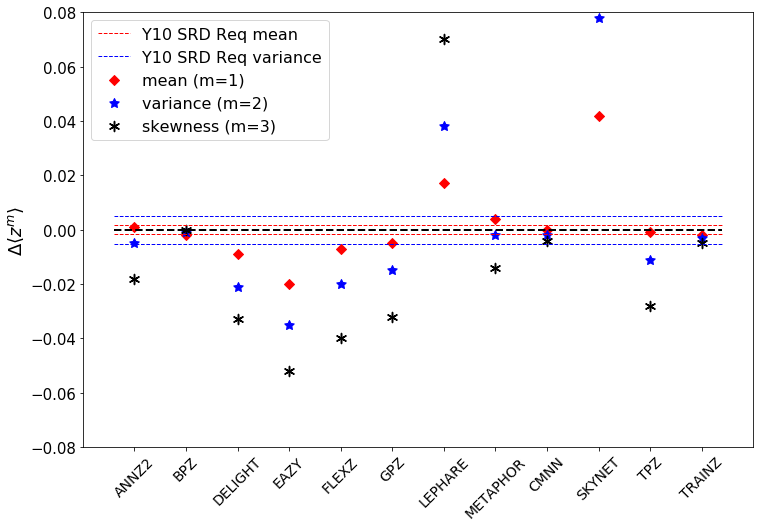

In [11]:
plt.rcParams['ytick.labelsize']=15
fig = plt.figure(figsize=(12,8))
#ax = plt.axes()
plt.scatter(xvals,deltamom[:,0],s=100,marker =(4,0,0),color='r',label="mean (m=1)")
plt.scatter(xvals,deltamom[:,1],s=100,marker =(5,1,0),color='b',label="variance (m=2)")
plt.scatter(xvals,deltamom[:,2],s=100,marker= (6,2,0),color='k',label="skewness (m=3)")
plt.plot([-.4,11.4],[0,0],'k--',lw=2)
plt.xticks(xvals,labels,rotation=45,fontsize=14)
#requirements limits
plt.plot([-.4,11.4],[-1.*lims[0],-1.*lims[0]],'r--',lw=1,label="Y10 SRD Req mean")
plt.plot([-.4,11.4],[lims[0],lims[0]],'r--',lw=1)
plt.plot([-.4,11.4],[-1.*lims[1],-1.*lims[1]],'b--',lw=1,label = "Y10 SRD Req variance")
plt.plot([-.4,11.4],[lims[1],lims[1]],'b--',lw=1)
plt.ylim(-.08,.08)
plt.ylabel(r"$\Delta \langle z^{m}\rangle$",fontsize=18)
plt.legend(loc='upper left',fontsize=16)
plt.savefig("momentsplot_10yr.jpg",fmt="jpg")